# EDA Consumo de Energia

A análise foi realizada com dois conjuntos de dados. O primeiro, proveniente do [**UCI Machine Learning Repository**](https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption), contém informações sobre o consumo de energia de uma residência em Sceaux, França, com registros de medições elétricas, em destaque, **global active power** (kW/min), **data** e **hora**. O segundo conjunto, fornecido pela [**Visual Crossing**](https://www.visualcrossing.com/), contém dados climáticos diários de Sceaux entre **01/01/2007 e 26/09/2009**, incluindo variáveis como temperatura e condições meteorológicas. A combinação desses dados permitiu relacionar o consumo de energia e fatores climáticos.



In [1]:
# Bibliotecas para manipulação deUC Irvine dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

## Importação dos dados

Download da tabela CSV diretamente do link fornecido pelo [UC Irvine](https://archive.ics.uci.edu/).

In [2]:
url = "https://archive.ics.uci.edu/static/public/235/individual+household+electric+power+consumption.zip"
data = pd.read_csv(url, delimiter=';', low_memory=False, compression= "zip")

## Investigação e Limpeza

É preciso entender o conjunto de dados e lidar com dados ausêntes ou em formatos inadequados, para que esses sirvam de entrada em modelos de machine learning.

### Sobre os Tipos de Dados

In [3]:
# Observação das primeiras 5 linhas da tabela
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
# Cópia da tabela inicial caso seja necessário um backup
energy_df = data.copy()

A linha abaixo coletaria uma amostra de 10% dos dados, nesse caso o código roda mais rápido mas as linhas escolhidas podem não ser representativas do todo. Para exetutar esse exemplo mais rápido, remova o símbolo '#' do início da linha.


In [5]:
# energy_df = energy_df.sample(int(energy_df.shape[0] * 0.10))

In [6]:
# Informações básicas sobre as colunas.
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


Exceto a coluna 'Sub_metering_3', as demais estão em formatos inapropriados ('object') para calcular e vizualizar quantidades. Uma vez que a maioria dos dados é numérica, segue a correção.

In [7]:
# Conversão das colunas em ponto decimal para tipos numéricos.

float_features = ["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity", "Sub_metering_1", "Sub_metering_2"]
energy_df[float_features] = energy_df[float_features].apply(pd.to_numeric, errors='coerce')

In [8]:
# Conversão da coluna 'Date' para datetime64
energy_df["Date"] = pd.to_datetime(energy_df["Date"], format="%d/%m/%Y")

# Conversão da coluna 'Time' para deltatime
energy_df["Time"] = pd.to_timedelta(energy_df["Time"])

Verificação se os tipos de dados estão apropriados.

In [9]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   Date                   datetime64[ns] 
 1   Time                   timedelta64[ns]
 2   Global_active_power    float64        
 3   Global_reactive_power  float64        
 4   Voltage                float64        
 5   Global_intensity       float64        
 6   Sub_metering_1         float64        
 7   Sub_metering_2         float64        
 8   Sub_metering_3         float64        
dtypes: datetime64[ns](1), float64(7), timedelta64[ns](1)
memory usage: 142.5 MB


### Leitura das Colunas

In [10]:
energy_df[["Date", "Time"]].describe()

,Date,Time
count,2075259,2075259
mean,2008-12-05 19:13:27.255191040,0 days 11:59:32.744809202
min,2006-12-16 00:00:00,0 days 00:00:00
25%,2007-12-12 00:00:00,0 days 06:00:00
50%,2008-12-06 00:00:00,0 days 12:00:00
75%,2009-12-01 00:00:00,0 days 18:00:00
max,2010-11-26 00:00:00,0 days 23:59:00
std,NaN,0 days 06:55:41.677081176


In [11]:
# A fim de visualizar os dados faz-se a conversão do tempo em deltatime para horas
energy_df["Hour"] = (energy_df["Time"] / pd.Timedelta(hours=1)).astype(int)

In [12]:
def histogram_date_time(df):
  fig, ax = plt.subplots(1, 2, figsize=(10, 4))

  sns.histplot(data= df, x= "Hour", bins= 24, ax= ax[0])

  ax[0].set_title("Distribuição da Frequência das Horas")

  sns.histplot(data= df, x= "Date", bins= 16, ax= ax[1])

  anos = [str(i) for i in range(2007, 2012)]
  ax[1].set_xticks([ano+"-01-01" for ano in anos])
  ax[1].set_xticklabels(anos)
  ax[1].set_title("Distribuição da Frequência dos Anos")

  plt.tight_layout()


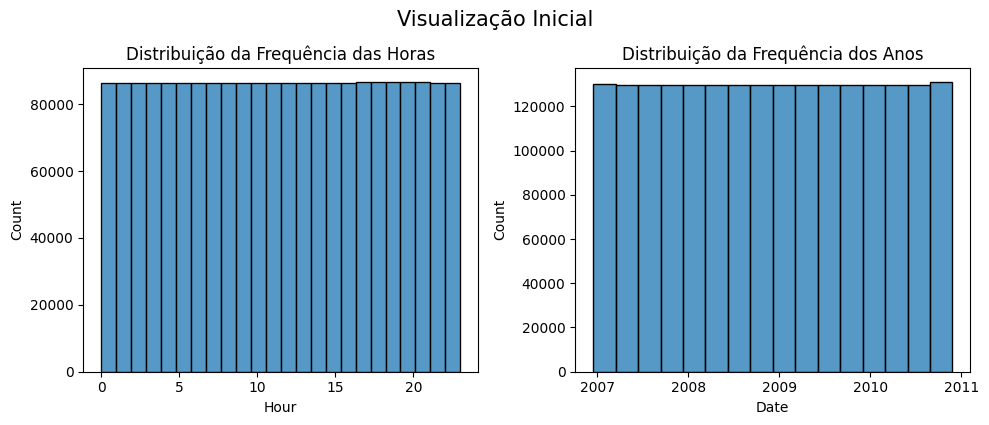

In [13]:
# Visualização das datas e horas dos dados ausêntes
histogram_date_time(energy_df)
plt.suptitle("Visualização Inicial", y= 1.05, fontsize= 15)
plt.show()

Dados os resumo estatístico e os gráficos acima, obtemos uma cronologia uniforme sobre o registro de eletricidade.

In [14]:
energy_df[float_features].describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01


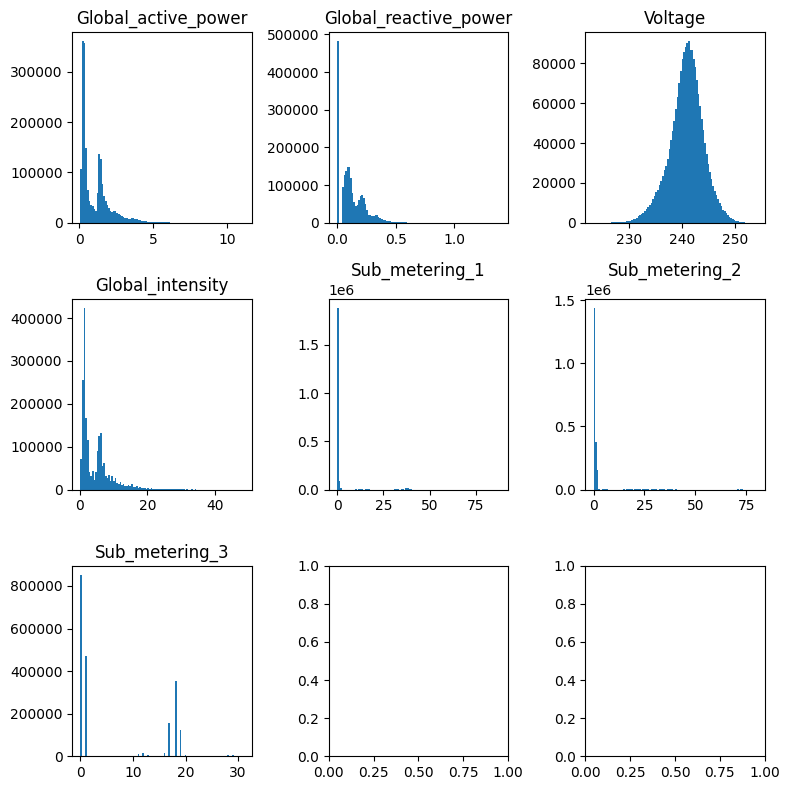

In [15]:
# Sub_metering_3 já era float, então adicionamos a essa lista agora para visualização
if "Sub_metering_3" not in float_features:
  float_features.append("Sub_metering_3")

# Calculo básico para definir o tamanho da matriz de gráficos
matrix_plot_size =  np.sqrt(len(float_features))
matrix_plot_size = int(matrix_plot_size + 1) if matrix_plot_size % 1 > 0 else int(matrix_plot_size)

# Definição da matriz de gráficos
fig, ax = plt.subplots(matrix_plot_size, matrix_plot_size, figsize=(8, 8))

count = 0
# Laço para desenhar todos os gráficos
for i in range(matrix_plot_size):
    for j in range(matrix_plot_size):
      # Se a contagem de todas as colunas foram desenhadas, então pare o ciclo
      if count >= len(float_features):
        break

      # Tente desenhar o gráfico na posição (i, j)
      try:
        ax[i, j].hist(energy_df[float_features[count]], bins= 100)
      # Em caso de erro imprima o problema e continue
      except Exception as e:
        print(e)

      # Defina o título como o nome da coluna
      ax[i, j].set_title(float_features[count])
      count += 1

plt.tight_layout()
plt.show()

A variável mais importante a ser prevista, o consumo de eletricidade média por minuto (kw/min) em 'Global_active_power', apresenta dispersão acentuada para esquerda e dois picos, ambos aproximadamente sobre os valores zero e dois.

Já as colunas "Sub_metering" parecem condizem com a fatoração do consumo total, mas nesse caso, mais espaçada dado que a amostragem foi feita em horas. Essas e as demais características me parecem irrelavantes para prever, logo, essas serão ignoradas considerando o escopo desse projeto.

### Valores Ausêntes

In [16]:
# Verifica se há valores ausêntes na tabela
energy_df.isnull().sum()

,0
Date,0
Time,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979
Hour,0


In [17]:
print("{:.2f}% de dados ausêntes".format((25979/ energy_df.shape[0]) * 100))

1.25% de dados ausêntes


Ainda que a maior parte das amostras de eletricidade estejam na tabela, é preciso verificar se essa lacuna de informações pode desbalancear o conjunto.

In [18]:
missing_data = energy_df.loc[energy_df.isna().any(axis= 1), ["Date", "Hour"]]

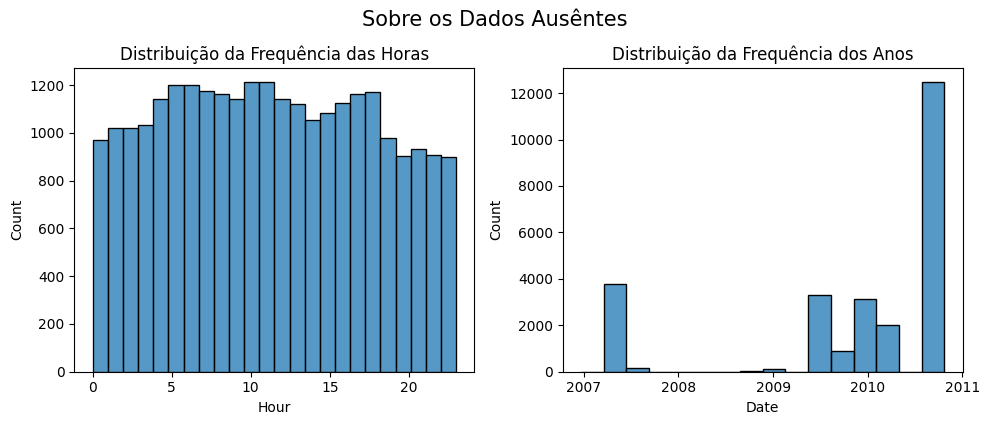

In [19]:
histogram_date_time(missing_data)

plt.suptitle("Sobre os Dados Ausêntes", y= 1.05, fontsize= 15)
plt.show()

Não há problema em remover esses dados. Uma vez que o tempo dos valores nulos é a grosso modo uniforme, e o máximo de valores ausêntes por trimestre chega 12 mil, o que representa apenas cerca de 10% do total no mesmo período.

In [20]:
# Descarta valores nulos
energy_df.dropna(inplace= True)

In [21]:
# Verifica se ainda há algum valor ausênte
energy_df.isna().any().any()

False

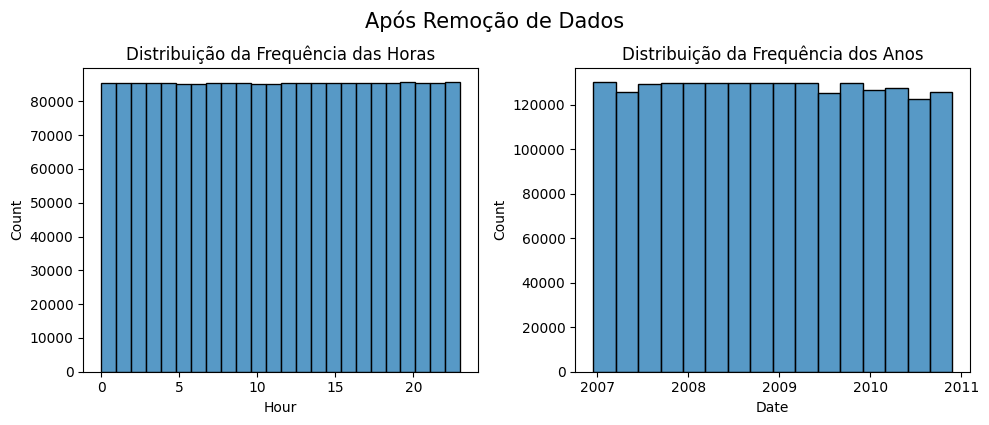

In [22]:
# Verificação do dataset após remoção dos dados

histogram_date_time(energy_df)

plt.suptitle("Após Remoção de Dados", y= 1.05, fontsize= 15)
plt.show()

As distribuições ainda parecem uniformes, o que é satisfatório.

Agora vejamos o comportamento entre as variáveis preditivas e preditoras até o momento.

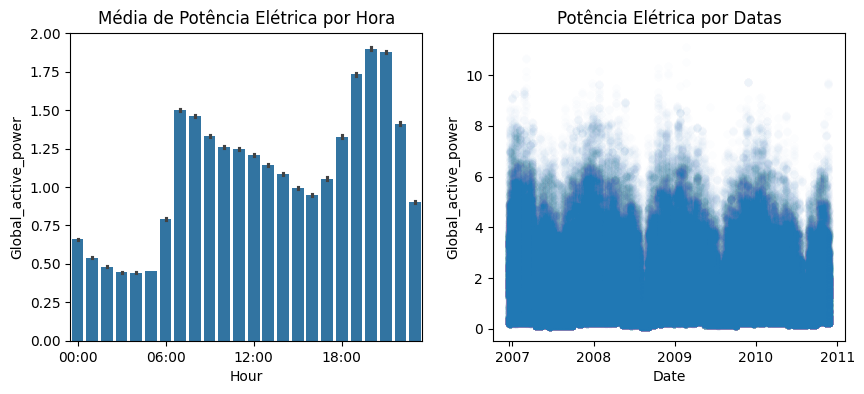

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Gráfico de barras entre horas e potência elétrica
sns.barplot(data= energy_df, x= "Hour", y= "Global_active_power",
                ax= ax[0], estimator = "mean")
ax[0].set_xticks([0, 6, 12, 18])
ax[0].set_xticklabels(["00:00", "06:00", "12:00", "18:00"])
ax[0].set_title("Média de Potência Elétrica por Hora")

# Gráfico de pontos entre Datas e potência elétrica
sns.scatterplot(data= energy_df, x= "Date", y= "Global_active_power",
                ax= ax[1], alpha= 0.01)
anos = [str(i) for i in range(2007, 2012)]
ax[1].set_xticks([energy_df["Date"].min()] + [ano+"-01-01" for ano in anos])
ax[1].set_xticklabels([""] + anos)
ax[1].set_title("Potência Elétrica por Datas")

plt.show()

A partir dos gráficos é possível análisar os horários do dia que o morador é mais ativo: depois da 6 da manhã com pico às 20 horas; indo descansar por volta das 23:00 até as 6:00 horas. Quanto as datas, parece haver uma elevação de consumo no período de inverno (fim e início de ano) e queda de consumo no verão (meio do ano).

## Extração de Características

Depois de conhecer um pouco mais sobre esse conjunto de dados, imagino que basta fazer previsões da potência média de horas, uma vez que a visualização minuto a minuto é muito ruidosa.

In [24]:
energy_df = energy_df[["Date", "Hour", "Global_active_power"]].groupby(["Date", "Hour"]).mean()
energy_df.reset_index(inplace= True)
energy_df

,Date,Hour,Global_active_power
0,2006-12-16,17,4.222889
1,2006-12-16,18,3.632200
2,2006-12-16,19,3.400233
3,2006-12-16,20,3.268567
4,2006-12-16,21,3.056467
...,...,...,...
34163,2010-11-26,17,1.725900
34164,2010-11-26,18,1.573467
34165,2010-11-26,19,1.659333
34166,2010-11-26,20,1.163700


Pode ser interessante adicionar as condições climáticas baseado nas datas.

In [25]:
# Usar uma apply com função é lento que condicionais em loc
# Deve ser o bastante nesse caso além de ser mais legível

def get_season(data):
    if ((data >= pd.to_datetime(f'{data.year}-03-21')) and
        (data <= pd.to_datetime(f'{data.year}-06-20'))):
        return 'Spring'
    elif ((data >= pd.to_datetime(f'{data.year}-06-21')) and
        (data <= pd.to_datetime(f'{data.year}-09-20'))):
        return 'Summer'
    elif ((data >= pd.to_datetime(f'{data.year}-09-21')) and
          (data <= pd.to_datetime(f'{data.year}-12-20'))):
        return 'Autumn'
    else:
        return 'Winter'

# Aplica a função para determinar a estação do ano
energy_df['season'] = energy_df['Date'].apply(get_season)

# Obtem contagem de cada valor de estação
energy_df['season'].value_counts()

,count
season,
Spring,8704
Summer,8698
Winter,8592
Autumn,8174


In [26]:
# Extração das partes do ano
energy_df["Year"] = energy_df["Date"].dt.year
energy_df["DayOfYear"] = energy_df["Date"].dt.dayofyear

### Adição de Dados Climáticos

In [27]:
# Leitura de 1000 amostras do clima de Sceaux por dia
sceaux_weather = pd.read_csv("sceaux_2007-01_to_2009-09.csv")

# Observação das 5 primeiras linhas
sceaux_weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Sceaux,2007-01-01,56.7,42.5,49.9,56.7,35.4,47.3,41.9,74.7,...,NaN,NaN,NaN,2007-01-01T08:44:06,2007-01-01T17:04:36,0.42,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"07149099999,07156099999,07146099999,0714509999..."
1,Sceaux,2007-01-02,46.2,40.8,43.8,41.5,34.2,37.5,37.8,79.3,...,NaN,NaN,NaN,2007-01-02T08:44:04,2007-01-02T17:05:35,0.46,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"07149099999,07156099999,07146099999,0714509999..."
2,Sceaux,2007-01-03,45.9,40.1,43.6,41.2,36.1,38.9,39.7,86.2,...,NaN,NaN,NaN,2007-01-03T08:43:59,2007-01-03T17:06:37,0.50,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"07149099999,07156099999,07146099999,0714509999..."
3,Sceaux,2007-01-04,51.5,45.1,48.3,51.5,38.3,44.5,42.6,81.0,...,NaN,NaN,NaN,2007-01-04T08:43:51,2007-01-04T17:07:41,0.53,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,rain,"07149099999,07156099999,07146099999,0714509999..."
4,Sceaux,2007-01-05,51.9,47.3,49.3,51.9,43.2,47.1,44.9,84.6,...,NaN,NaN,NaN,2007-01-05T08:43:39,2007-01-05T17:08:48,0.56,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"07149099999,07156099999,07146099999,0714509999..."


In [28]:
# Nomes das colunas
sceaux_weather.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [29]:
# Seleção das colunas de interesse
interesting_features = ['tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'humidity', 'precip',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'cloudcover'
       ]

In [30]:
# renomeação da coluna 'datetime' para 'date'
sceaux_weather.rename(columns= {"datetime": "Date"}, inplace= True)

# Adiciona 'Date' para as características de interesse
interesting_features.append("Date")

In [31]:
# Conversão das datas para o formato de datetime64
sceaux_weather["Date"] = pd.to_datetime(sceaux_weather["Date"], format="%Y-%m-%d")

In [32]:
# União dos dados de energia com os de clima através das datas
energy_weather = pd.merge(energy_df, sceaux_weather[interesting_features],
                          on= "Date", how= "inner")

In [33]:
energy_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23870 entries, 0 to 23869
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 23870 non-null  datetime64[ns]
 1   Hour                 23870 non-null  int64         
 2   Global_active_power  23870 non-null  float64       
 3   season               23870 non-null  object        
 4   Year                 23870 non-null  int32         
 5   DayOfYear            23870 non-null  int32         
 6   tempmax              23870 non-null  float64       
 7   tempmin              23870 non-null  float64       
 8   temp                 23870 non-null  float64       
 9   feelslikemax         23870 non-null  float64       
 10  feelslikemin         23870 non-null  float64       
 11  feelslike            23870 non-null  float64       
 12  humidity             23870 non-null  float64       
 13  precip               23870 non-

In [34]:
energy_weather.describe()

,Date,Hour,Global_active_power,Year,DayOfYear,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,humidity,precip,precipcover,snow,snowdepth,windgust,windspeed,cloudcover
count,23870,23870.000000,23870.000000,23870.000000,23870.000000,23870.000000,23870.000000,23870.000000,23870.000000,23870.000000,23870.000000,23870.000000,23870.000000,23870.000000,23870.000000,23870.000000,23870.000000,23870.000000,23870.000000
mean,2008-05-14 07:50:40.167574528,11.504231,1.073852,2007.903226,170.381818,60.658333,47.363419,53.848978,59.711831,44.922296,52.155413,74.361889,0.055370,9.305911,0.002011,0.005530,24.190448,11.952836,61.694386
min,2007-01-01 00:00:00,0.000000,0.124000,2007.000000,1.000000,30.100000,13.600000,22.800000,22.300000,3.000000,13.200000,39.600000,0.000000,0.000000,0.000000,0.000000,6.700000,3.800000,0.000000
25%,2007-09-09 00:00:00,6.000000,0.322233,2007.000000,83.000000,50.900000,39.900000,45.600000,50.900000,35.700000,42.100000,67.300000,0.000000,0.000000,0.000000,0.000000,18.300000,9.000000,45.500000
50%,2008-05-14 00:00:00,12.000000,0.755283,2008.000000,168.000000,61.200000,47.600000,54.600000,61.200000,45.000000,54.200000,75.400000,0.001000,4.170000,0.000000,0.000000,22.600000,11.600000,67.700000
75%,2009-01-18 00:00:00,18.000000,1.561267,2009.000000,251.000000,70.800000,55.900000,63.200000,70.800000,55.900000,63.200000,82.600000,0.040000,12.500000,0.000000,0.000000,28.300000,14.300000,81.900000
max,2009-09-26 00:00:00,23.000000,6.560533,2009.000000,366.000000,95.100000,68.600000,79.500000,95.600000,68.600000,79.700000,97.100000,2.105000,79.170000,1.600000,1.200000,67.700000,29.600000,100.000000
std,NaN,6.923918,0.917038,0.789093,101.317419,12.857082,10.071729,11.195157,14.171536,12.391080,13.141743,11.060286,0.147344,13.492310,0.052258,0.066963,8.494402,3.993486,25.963079


Dado que o conjunto de dados sobre o clima só abrange o começo de 2007 até setembro de 2009, obtemos menos instâncias em compensação de mais caracteríticas.

In [35]:
# Obternha a matriz de correlação entre as variáveis
corr_matrix = pd.get_dummies(energy_weather).corr()

# Mostre somente aquelas relativas a potencia elétrica
corr_matrix["Global_active_power"].sort_values(ascending= False)

,Global_active_power
Global_active_power,1.000000
Hour,0.326371
season_Winter,0.180110
humidity,0.148671
season_Autumn,0.092389
"preciptype_rain,snow",0.069627
cloudcover,0.037451
windspeed,0.034104
snowdepth,0.016051
windgust,0.008822


In [36]:
# Criação de uma coluna para amplitude térmica
energy_weather["temprange"] = energy_weather["tempmax"] - energy_weather["tempmin"]

# Verificação da correlação entre amplitude térmica e potencia elétrica
energy_weather["Global_active_power"].corr(energy_weather["temprange"])

-0.1388558810079493

Aparentemente a amplitude térmica não tem tanta relevância para o algoritmo de machine learning. Além disso, considero que seja melhor descartar as variáveis de temperatura de correlação mais fraca (mais próximas a zero) para não enviesar o produto com a mesma métrica.

In [37]:
# Seleção de colunas com correlação muito baixa ou redundantes
columns_to_drop = [
    "tempmin", "tempmax", "feelslikemin", "feelslikemax", "temprange",
    "feelslike", "snow", "precipcover", "windgust"
    ]

# Remoção da coluna 'Date' pois não é compativel com algoritmos de ML
columns_to_drop = columns_to_drop + ["Date"]

energy_weather = energy_weather.drop(columns= columns_to_drop)

In [38]:
print("Colunas:", energy_weather.columns.values)
print("Número de colunas:", len(energy_weather.columns.values))
print("Número de amostras:", energy_weather.shape[0])

Colunas: ['Hour' 'Global_active_power' 'season' 'Year' 'DayOfYear' 'temp'
 'humidity' 'precip' 'preciptype' 'snowdepth' 'windspeed' 'cloudcover']
Número de colunas: 12
Número de amostras: 23870


# Considerações da Exploração

O conjunto de dados primário se trata sobre o registro do consumo de energia de uma casa na cidade de Sceaux na França. Ainda que houvessem mais de uma característica preditiva, foi escolhida apenas uma - a média de consumo elétrico por minuto (kW/min) em 'Global_active_power' - dado que só haviam duas colunas independentes: Data e Hora.

Durante a investigação dos dados foi percebido também que é mais fácil entender o consumo de energia caso o tempo fosse segmentado em horas, e que o clima ou as estações do ano pode ter alguma influência no uso de eletrônicos ou eletrodomésticos do morador.

Desse modo, foi feito o descarte de valores nulos de 'Global_active_power' que representam menos de 2% do conjunto das amostras sem alterar aparentemente a uniformidade dos registros. Depois disso, foi feita uma união interna com outro dataset contendo 1000 registros diários da cidade citada entre 01/01/2007 e 26/09/2009. A resultante foi um conjunto de dados com cerca de 24 mil amostras e 12 características.

In [39]:
energy_weather.to_csv("sceaux_energy_weather.csv")